# Phase 1 –*MLOps Course Project: Online News Popularity Dataset*
### Activity 02: Data Exploration and Preprocessing
**Team:** *41*  
**Course:** *Machine Learning Operations (MLOps)*  
**Institution:** Tecnológico de Monterrey  
**Date:** *October 10th, 2025*  

---

### **Team Members & Roles**
- **Data Engineer:** *Angel Iván Ahumada Arguelles*  
- **Data Scientist:** *Steven Sebastian Brutscher Cortez*  
- **Software Engineer:** *Ana Karen Estupiñán Pacheco*  
- **ML Engineer:** *Felipe de Jesús Gutiérrez Dávila*  

---

> *This notebook corresponds to the second collaborative deliverable of the MLOps course project.  
**Purpose:** Explore the cleaned dataset `df_final_validated.csv`, summarize structure and distributions, perform feature diagnostics, and prepare features via encoding and scaling where appropriate.*

**Primary author:** Felipe — ML Engineer  
**Collaborators:** Steven (Data Scientist); Ana Karen (Software Engineer); Ángel (Data Engineer)

# 02 – Data Exploration and Preprocessing  
### Phase 1 – MLOps Team 41 | Online News Popularity Dataset

**Purpose:**  
This notebook continues the work from the previous stage of data cleaning and validation (`V2_01_EDA_and_Data_Cleaning.ipynb`).  
Its main goal is to **explore the cleaned dataset (`df_final_validated.csv`)** through descriptive statistics and visual analyses, identify relevant patterns and correlations, and apply **preprocessing transformations** to prepare the data for model training.

**Objectives:**  
1. Perform an exploratory data analysis (EDA) on the validated dataset.  
2. Visualize feature distributions, relationships, and potential outliers.  
3. Analyze correlations between variables and their relation with the target (`shares`).  
4. Apply feature preprocessing, including:  
   - Normalization and scaling.  
   - Encoding of categorical or binary variables (if applicable).  
   - Optional dimensionality reduction for interpretability.  
5. Generate a final preprocessed dataset ready for modeling in the next phase.

**Expected Output:**  
- A well-documented exploratory analysis identifying the key variables that influence article popularity.  
- A `df_ready_for_modeling.csv` dataset that can be directly used in the following notebook (`03_Model_Training_and_Evaluation.ipynb`).  

**Context:**  
The dataset comes from the UCI Machine Learning Repository and includes social, textual, and temporal features that describe the performance of online news articles. The target variable `shares` represents the number of times each article was shared on social media.

---

### Workflow Overview
1. Load the validated dataset (`df_final_validated.csv`).  
2. Inspect dataset structure, data types, and summary statistics.  
3. Perform univariate and bivariate analysis (including visualizations).  
4. Check feature correlations and multicollinearity.  
5. Apply preprocessing transformations (scaling, encoding).  
6. Export the final preprocessed dataset.

---

> **Note:**  
> All preprocessing steps will be reproducible and documented for later integration in the DVC pipeline.

In [ ]:
# ===============================================================
# 02_Data_Exploration_and_Preprocessing.ipynb
# Phase 1 - MLOps Team 41 | Online News Popularity Dataset
# ===============================================================
# Section 1. Library imports and environment setup
# ===============================================================

# Core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and statistical tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.3f}'.format)
sns.set_theme(style='whitegrid', palette='muted')

# Silence warnings for clean output
import warnings
warnings.filterwarnings('ignore')

print("Libraries successfully loaded and environment configured.")

Libraries successfully loaded and environment configured.


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ===============================================================
# Section 2. Dataset loading
# ===============================================================

# Define dataset path (Google Drive)
path = "/content/drive/MyDrive/Colab Notebooks/Maestría MNA - IA Aplicada/TR5 - MLOPS/Fase 1/final_dataset/df_final_validated.csv"

# Load dataset
df = pd.read_csv(path)

# Basic information
print("Dataset successfully loaded.\n")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns\n")

# Preview first records
display(df.head())

# General info
print("\n--- Dataset Information ---")
df.info()

# Check missing values summary
missing_summary = df.isnull().sum()
print("\n--- Missing values summary ---")
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 else "No missing values detected.")

Dataset successfully loaded.

Shape: 39,235 rows × 62 columns



,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,731.000,12.000,219.000,0.664,1.000,0.815,4.000,2.000,1.000,0.000,4.680,7.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,496.000,496.000,496.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.378,0.040,0.041,0.040,0.522,0.119,0.046,0.000,0.769,0.000,0.379,0.100,0.700,-0.350,-0.600,-0.100,0.500,-0.188,0.000,0.188,593.000,493.000
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.000,9.000,255.000,0.605,1.000,0.792,3.000,1.000,1.000,0.000,4.914,4.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.800,0.050,0.050,0.050,0.050,0.341,0.149,0.043,0.000,0.733,0.000,0.287,0.100,0.700,-0.119,-0.125,-0.100,0.000,0.000,0.500,0.000,711.000,639.000
2,http://mashable.com/2013/01/07/apple-40-billio...,731.000,9.000,211.000,0.575,1.000,0.664,3.000,1.000,1.000,0.000,4.393,6.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,918.000,918.000,918.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.218,0.033,0.033,0.033,0.682,0.702,0.323,0.057,0.000,0.857,0.000,0.496,0.100,1.000,-0.467,-0.800,-0.133,0.000,0.000,0.500,0.000,"1,500.000",493.000
3,http://mashable.com/2013/01/07/astronaut-notre...,731.000,9.000,531.000,0.504,1.000,0.666,9.000,0.000,1.000,0.000,4.405,7.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.029,0.419,0.495,0.029,0.029,0.430,0.101,0.041,0.000,0.667,0.000,0.386,0.136,0.800,-0.370,-0.600,-0.167,0.000,0.000,0.500,0.000,"1,200.000",688.000
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.000,13.000,"1,072.000",0.416,1.000,0.541,19.000,12.842,20.000,0.000,4.683,7.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,545.000,"16,000.000","3,151.158",1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.029,0.029,0.029,0.029,0.885,0.514,0.281,0.075,0.000,0.860,0.000,0.411,0.033,1.000,-0.220,-0.500,-0.050,0.455,0.136,0.045,0.136,505.000,579.000



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39235 entries, 0 to 39234
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39235 non-null  object 
 1   timedelta                      39235 non-null  float64
 2   n_tokens_title                 39235 non-null  float64
 3   n_tokens_content               39235 non-null  float64
 4   n_unique_tokens                39235 non-null  float64
 5   n_non_stop_words               39235 non-null  float64
 6   n_non_stop_unique_tokens       39235 non-null  float64
 7   num_hrefs                      39235 non-null  float64
 8   num_self_hrefs                 39235 non-null  float64
 9   num_imgs                       39235 non-null  float64
 10  num_videos                     39235 non-null  float64
 11  average_token_length           39235 non-null  float64
 12  num_keywords     

In [ ]:
# ===============================================================
# Section 3. Structural and statistical summary
# ===============================================================

# Identify variable types
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"Numeric features: {len(num_cols)}")
print(f"Non-numeric features: {len(cat_cols)}\n")

# Summary table for numeric features
numeric_summary = df[num_cols].describe().T
numeric_summary['missing_%'] = df[num_cols].isnull().mean() * 100
numeric_summary['unique_values'] = df[num_cols].nunique()
numeric_summary = numeric_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing_%', 'unique_values']]

print("--- Numeric Variables Summary ---")
display(numeric_summary.head(10))

# Overview of non-numeric variables (if any)
if len(cat_cols) > 0:
    categorical_summary = pd.DataFrame({
        'unique_values': [df[c].nunique() for c in cat_cols],
        'most_frequent': [df[c].mode()[0] if not df[c].mode().empty else np.nan for c in cat_cols],
        'missing_%': [df[c].isnull().mean() * 100 for c in cat_cols]
    }, index=cat_cols)

    print("\n--- Non-numeric Variables Summary ---")
    display(categorical_summary)
else:
    print("No categorical variables detected in this dataset.")

Numeric features: 61
Non-numeric features: 1

--- Numeric Variables Summary ---


,count,mean,std,min,25%,50%,75%,max,missing_%,unique_values
timedelta,"39,235.000",354.068,211.739,8.000,169.000,338.000,539.000,731.000,0.000,724
n_tokens_title,"39,235.000",10.453,2.167,4.207,9.000,10.000,12.000,16.575,0.000,14
n_tokens_content,"39,235.000",537.922,410.503,0.000,249.000,413.000,718.000,"1,822.919",0.000,1753
n_unique_tokens,"39,235.000",0.535,0.143,0.000,0.473,0.541,0.610,1.000,0.000,26568
n_non_stop_words,"39,235.000",0.971,0.168,0.000,1.000,1.000,1.000,1.000,0.000,1448
n_non_stop_unique_tokens,"39,235.000",0.676,0.155,0.000,0.628,0.692,0.756,1.000,0.000,22348
num_hrefs,"39,235.000",10.678,9.333,0.000,4.000,8.000,14.000,40.371,0.000,42
num_self_hrefs,"39,235.000",3.187,2.872,0.000,1.000,3.000,4.000,12.842,0.000,14
num_imgs,"39,235.000",4.298,6.659,0.000,1.000,1.000,4.000,25.900,0.000,27
num_videos,"39,235.000",1.009,2.444,0.000,0.000,0.000,1.000,11.210,0.000,13



--- Non-numeric Variables Summary ---


,unique_values,most_frequent,missing_%
url,39235,http://mashable.com/2013/01/07/amazon-instant-...,0.000


## 4. Exploratory Data Analysis (Univariate and Correlation Analysis)

### Summary of previous findings
The validated dataset `df_final_validated.csv` contains 39,235 rows and 62 columns (61 numeric and 1 categorical: `url`).
No missing values were detected, and all numeric variables are correctly typed.  
This confirms that the dataset is fully consistent and ready for exploratory analysis.

### Objective of this section
The goal of this section is to analyze the statistical behavior and relationships among key variables to better understand the structure of the data.

Specifically, we will:
1. Visualize univariate distributions (histograms and boxplots) for key features and the target variable (`shares`).
2. Examine correlations between numeric variables, identifying potential multicollinearity.
3. Detect outliers and analyze data dispersion to guide future normalization and scaling decisions.
4. Derive insights about variable distributions and their relationships with the target variable.

**Note on correlations**
To avoid type errors, correlations are computed only on numeric columns. The `url` column is excluded. We also drop constant-variance columns to prevent NaNs in the correlation matrix and report the top positive and negative correlations with the target (`shares`).

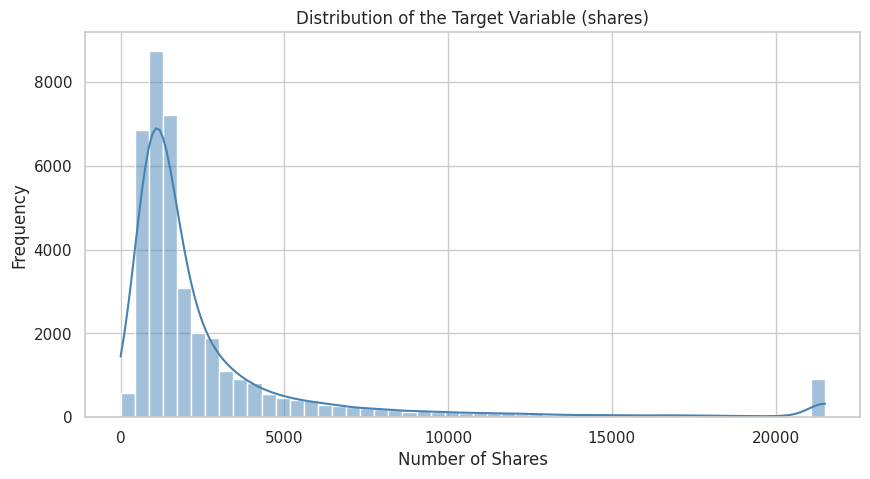

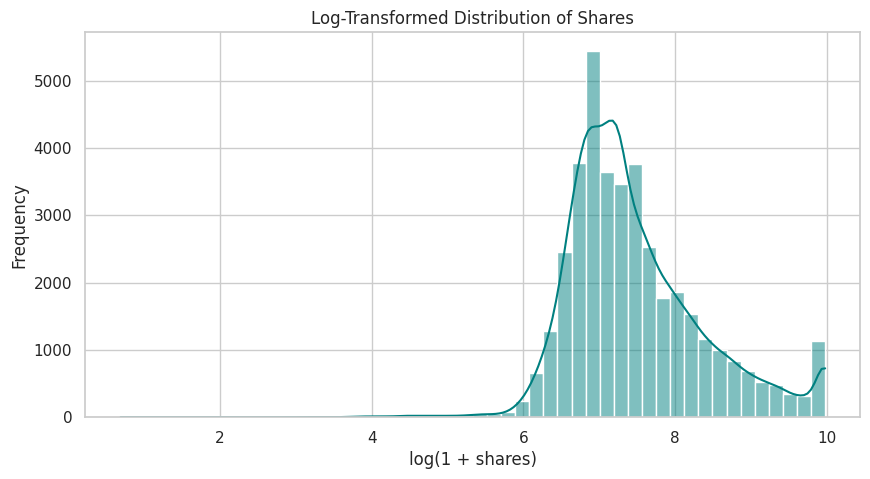

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,"39,235.000",10.453,2.167,4.207,9.000,10.000,12.000,16.575
n_tokens_content,"39,235.000",537.922,410.503,0.000,249.000,413.000,718.000,"1,822.919"
num_hrefs,"39,235.000",10.678,9.333,0.000,4.000,8.000,14.000,40.371
num_imgs,"39,235.000",4.298,6.659,0.000,1.000,1.000,4.000,25.900
num_videos,"39,235.000",1.009,2.444,0.000,0.000,0.000,1.000,11.210
average_token_length,"39,235.000",4.634,0.581,2.022,4.483,4.667,4.859,7.070
global_rate_positive_words,"39,235.000",0.040,0.024,0.000,0.029,0.039,0.050,0.902
global_rate_negative_words,"39,235.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000
kw_avg_avg,"39,235.000","3,784.017","12,161.925",0.000,"2,394.627","2,875.947","3,603.364","510,153.245"
self_reference_avg_sharess,"39,235.000","7,958.568","107,776.750",0.000,"1,000.000","2,200.000","5,135.750","19,530,000.000"


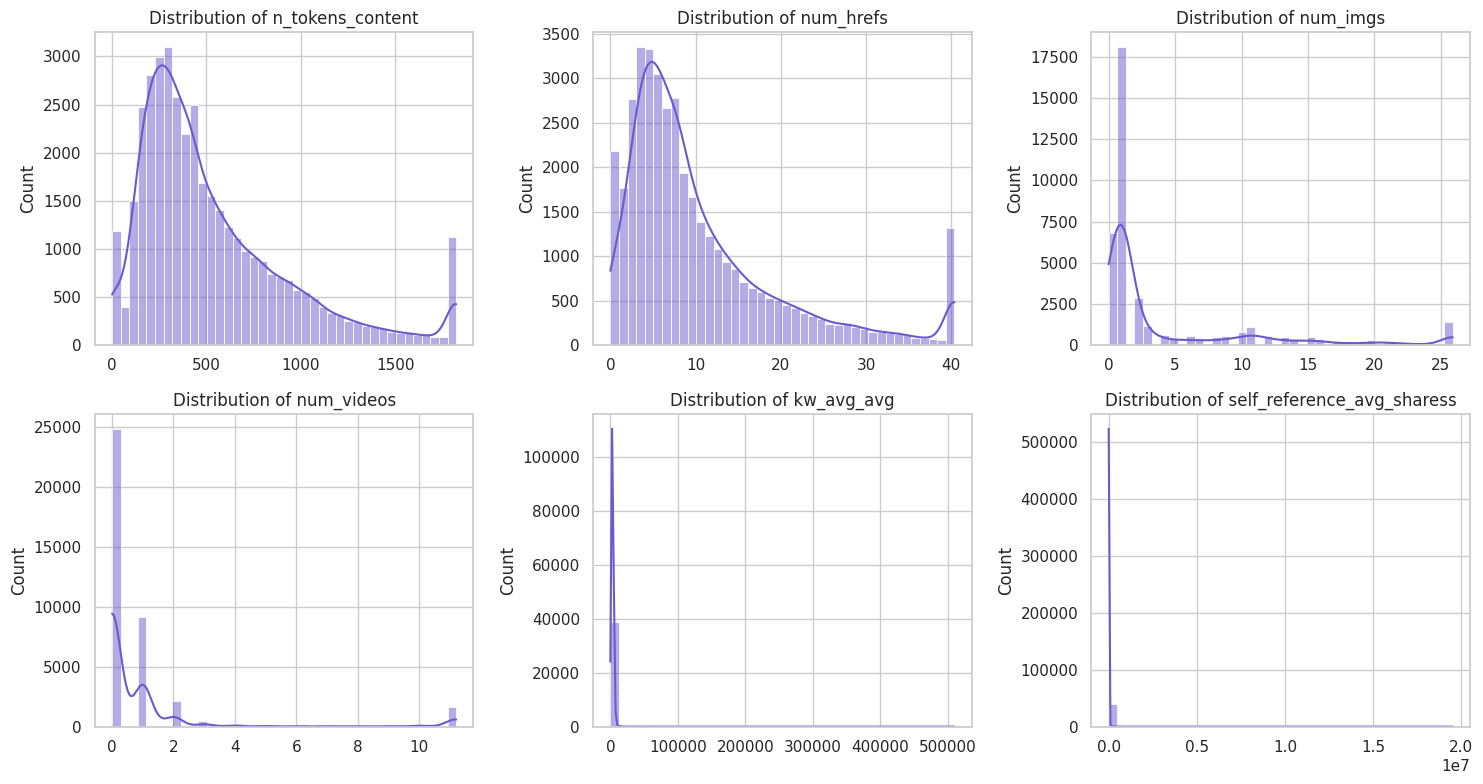

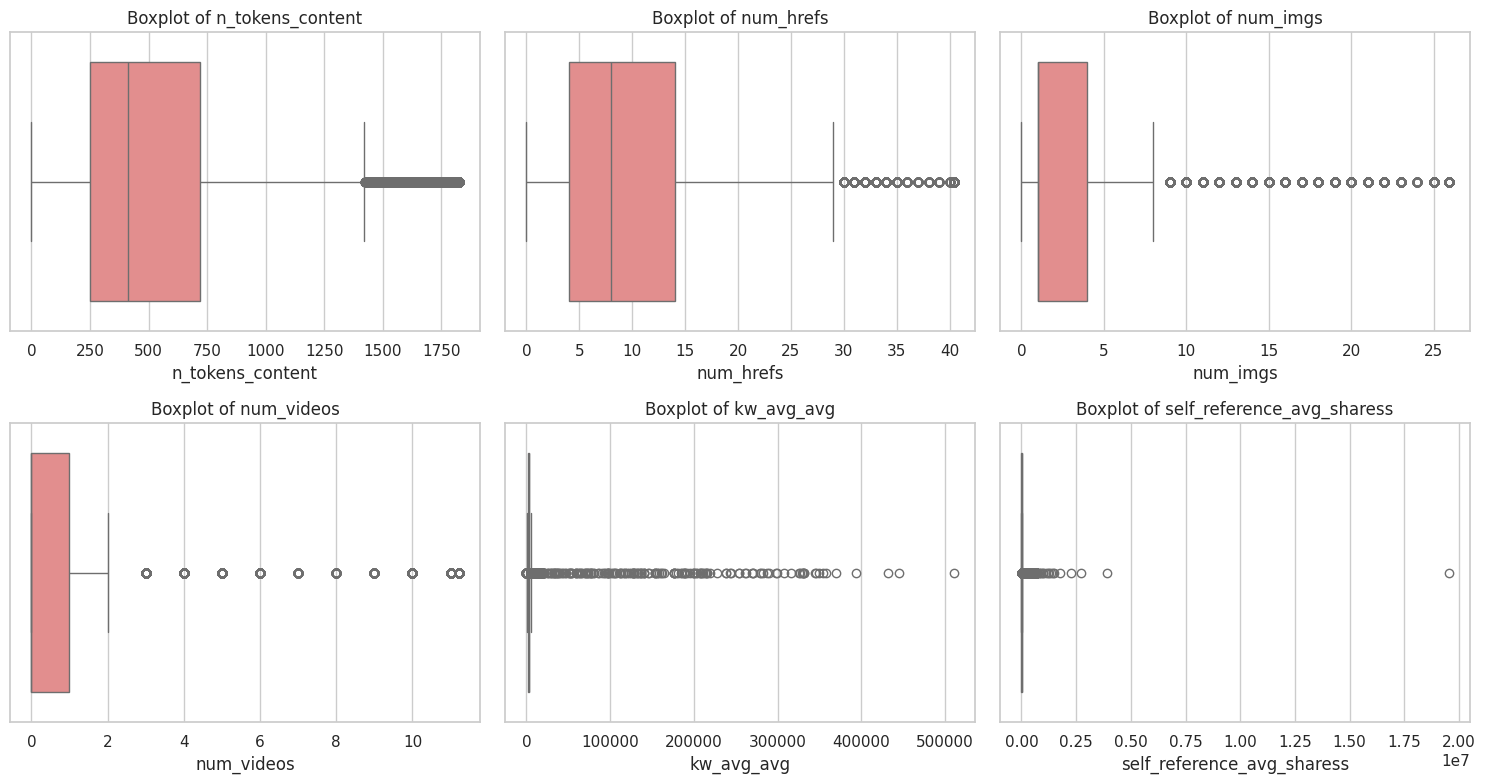

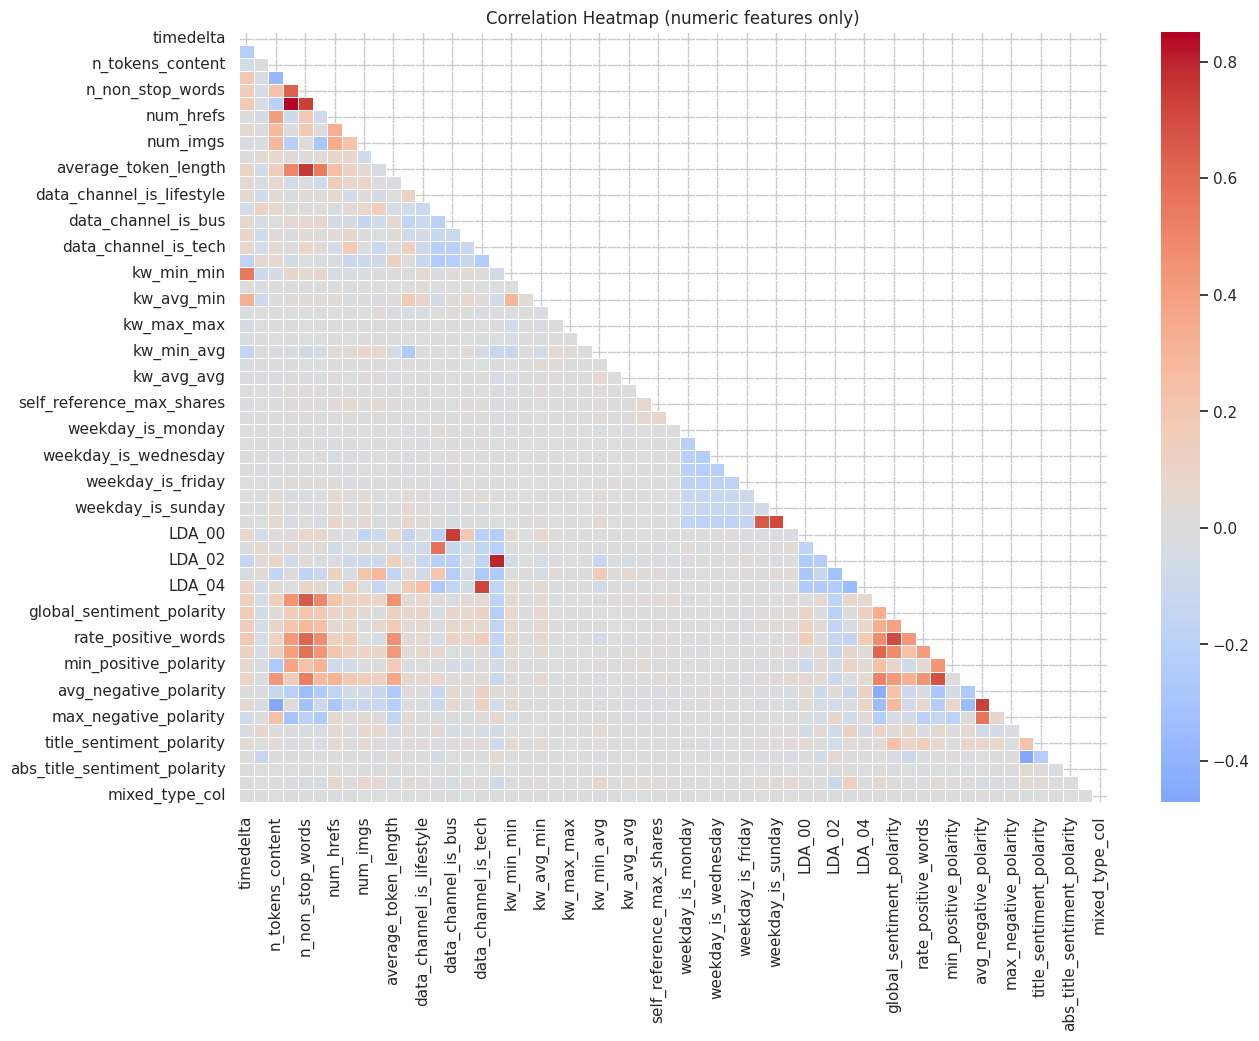

--- Top Positive Correlations with 'shares' ---


,shares
shares,1.000
LDA_03,0.136
num_imgs,0.085
num_hrefs,0.072
kw_min_avg,0.072
global_subjectivity,0.057
is_weekend,0.056
title_subjectivity,0.044
num_videos,0.044
weekday_is_sunday,0.040



--- Top Negative Correlations with 'shares' ---


,shares
weekday_is_wednesday,-0.017
weekday_is_tuesday,-0.018
rate_positive_words,-0.021
min_negative_polarity,-0.027
data_channel_is_entertainment,-0.031
n_non_stop_words,-0.037
average_token_length,-0.040
n_non_stop_unique_tokens,-0.041
avg_negative_polarity,-0.042
data_channel_is_bus,-0.044


In [ ]:
# ===============================================================
# Section 4. Exploratory Data Analysis (Univariate and Correlation Analysis)
# ===============================================================

# --- 4.1. Distribution of the target variable ("shares")
plt.figure(figsize=(10,5))
sns.histplot(df["shares"], bins=50, kde=True, color='steelblue')
plt.title("Distribution of the Target Variable (shares)")
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")
plt.show()

# Log-transformed distribution for skewness inspection
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df["shares"]), bins=50, kde=True, color='teal')
plt.title("Log-Transformed Distribution of Shares")
plt.xlabel("log(1 + shares)")
plt.ylabel("Frequency")
plt.show()

# --- 4.2. Descriptive summary for selected key features
key_features = [
    "n_tokens_title", "n_tokens_content", "num_hrefs",
    "num_imgs", "num_videos", "average_token_length",
    "global_rate_positive_words", "global_rate_negative_words",
    "kw_avg_avg", "self_reference_avg_sharess"
]

display(df[key_features].describe().T)

# --- 4.3. Histograms for selected continuous variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features_to_plot = ["n_tokens_content", "num_hrefs", "num_imgs", "num_videos", "kw_avg_avg", "self_reference_avg_sharess"]

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.histplot(df[feature], bins=40, kde=True, ax=ax, color='slateblue')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

# --- 4.4. Boxplots to visualize dispersion and outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.boxplot(x=df[feature], ax=ax, color='lightcoral')
    ax.set_title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

# --- 4.5. Safe correlation analysis on numeric subset ---

# Keep only numeric columns
df_num = df.select_dtypes(include=[np.number]).copy()

# Drop constant columns (std == 0), which produce NaNs in correlations
const_cols = [c for c in df_num.columns if df_num[c].std(ddof=0) == 0]
if const_cols:
    df_num = df_num.drop(columns=const_cols)

# Pearson correlation matrix
corr_matrix = df_num.corr(method="pearson")

# Heatmap (upper triangle for readability)
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, linewidths=0.4)
plt.title("Correlation Heatmap (numeric features only)")
plt.show()

# Correlations with target
if "shares" in df_num.columns:
    corr_with_target = corr_matrix["shares"].sort_values(ascending=False)

    print("--- Top Positive Correlations with 'shares' ---")
    display(corr_with_target.head(12))

    print("\n--- Top Negative Correlations with 'shares' ---")
    display(corr_with_target.tail(12))
else:
    print("Column 'shares' not found in numeric frame; cannot compute target correlations.")

## 5. Data Preprocessing: Scaling, Encoding, and Dimensionality Preparation

### Insights from the exploratory analysis
The correlation analysis revealed that:
- The target variable `shares` exhibits **low linear correlations** with most features, suggesting that nonlinear models may perform better than simple regressions.
- Positive relationships were observed with engagement-related metrics such as `num_imgs`, `num_hrefs`, and latent semantic features (`LDA_03`).
- Negative relationships appeared with weekday and channel variables, particularly `data_channel_is_world` and `LDA_02`.
- The variable `shares` is **right-skewed**, meaning that most articles have low popularity while a few reach extremely high share counts.

These findings justify data transformations to stabilize variance and improve model interpretability.

### Objective of this section
In this section, we will:
1. Prepare the dataset for modeling by applying normalization and scaling techniques.
2. Encode categorical and binary variables (although only `url` is non-numeric, and will be dropped for modeling).
3. Optionally apply dimensionality reduction (PCA) to visualize feature compactness.
4. Export the ready-to-train dataset as `df_ready_for_modeling.csv`.

These steps ensure consistent feature magnitudes and optimize model convergence during training.

Scaled datasets generated successfully:
- Standardized (mean=0, std=1): (39235, 60)
- Min-Max (0–1): (39235, 60)


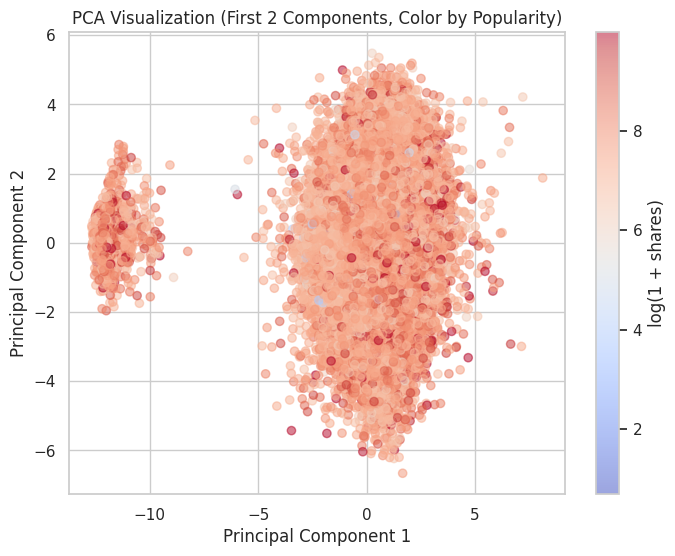

Dataset exported successfully to: /content/drive/MyDrive/Colab Notebooks/Maestría MNA - IA Aplicada/TR5 - MLOPS/Fase 1/final_dataset/df_ready_for_modeling.csv
Final shape: (39235, 61)


In [ ]:
# ===============================================================
# Section 5. Data Preprocessing (Scaling, Encoding, Dimensionality)
# ===============================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# --- 5.1. Drop non-modeling columns (like 'url')
df_prep = df.drop(columns=["url"], errors="ignore").copy()

# --- 5.2. Separate features and target
X = df_prep.drop(columns=["shares"], errors="ignore")
y = df_prep["shares"] if "shares" in df_prep.columns else None

# --- 5.3. Scaling options (standardization and min-max normalization)
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

X_std = pd.DataFrame(scaler_std.fit_transform(X), columns=X.columns)
X_mm = pd.DataFrame(scaler_mm.fit_transform(X), columns=X.columns)

print("Scaled datasets generated successfully:")
print(f"- Standardized (mean=0, std=1): {X_std.shape}")
print(f"- Min-Max (0–1): {X_mm.shape}")

# --- 5.4. Optional: Dimensionality reduction with PCA for exploratory visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=np.log1p(y), cmap="coolwarm", alpha=0.5)
plt.colorbar(label="log(1 + shares)")
plt.title("PCA Visualization (First 2 Components, Color by Popularity)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# --- 5.5. Recombine standardized features with target
df_ready = X_std.copy()
df_ready["shares"] = y.values

# --- 5.6. Export ready dataset
output_path = "/content/drive/MyDrive/Colab Notebooks/Maestría MNA - IA Aplicada/TR5 - MLOPS/Fase 1/final_dataset/df_ready_for_modeling.csv"
df_ready.to_csv(output_path, index=False)
print(f"Dataset exported successfully to: {output_path}")
print(f"Final shape: {df_ready.shape}")

## 6. Conclusions and Next Steps

### Summary
This notebook completed the *Exploration and Preprocessing* phase of the MLOps pipeline.
We verified data integrity, analyzed distributions and correlations, and applied standard scaling
to prepare the dataset for machine learning models. The resulting dataset `df_ready_for_modeling.csv`
is clean, normalized, and ready for training.

### Key insights
- The target variable (`shares`) is highly skewed and weakly correlated with most features,
  indicating that nonlinear models may perform better.
- Scaling successfully standardized all features, reducing variance bias across dimensions.
- PCA visualization suggests clusters of articles that may correspond to distinct content channels
  or writing styles.

### Next steps
1. Move to **Notebook 3 – Model Construction, Tuning, and Evaluation**.
2. Split the dataset into training and test sets.
3. Train baseline models (Linear Regression, KNN, Random Forest).
4. Evaluate using metrics such as RMSE, MAE, and R².
5. Version the models and metrics using DVC for reproducibility.

This marks the end of Phase 1.2 – *Exploration and Preprocessing*.